In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Chess Games Dataset/chess_games.csv")

In [3]:
df.describe(include='all')

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
count,20058.000000,20058,20058.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058.000000,20058,20058,1207,14398
unique,NaN,2,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,NaN,1477,128,3,615
top,NaN,True,NaN,Resign,White,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,NaN,Van't Kruijs Opening,Sicilian Defense,Declined,#2
freq,NaN,16155,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,NaN,368,2632,503,797
mean,10029.500000,NaN,60.465999,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,4.816981,NaN,NaN,NaN,NaN
std,5790.390185,NaN,33.570585,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,2.797152,NaN,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,5015.250000,NaN,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
50%,10029.500000,NaN,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
75%,15043.750000,NaN,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

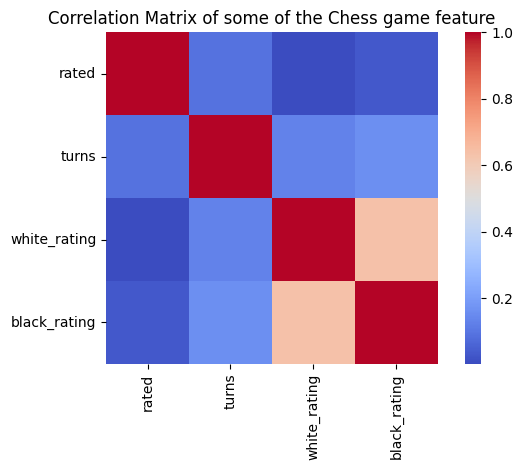

In [15]:
#correlation analysis of relevant numerical columns
num_columns = df[['rated','turns', 'white_rating', 'black_rating']]

#the correlation matrix
corr_matrix = num_columns.corr()

#heatmap of the correlation matrix
sns.heatmap(corr_matrix, square = True, cmap = "coolwarm")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("Correlation Matrix of some of the Chess game feature")
plt.tight_layout()


Text(0.5, 1.0, 'Distribution of game results')

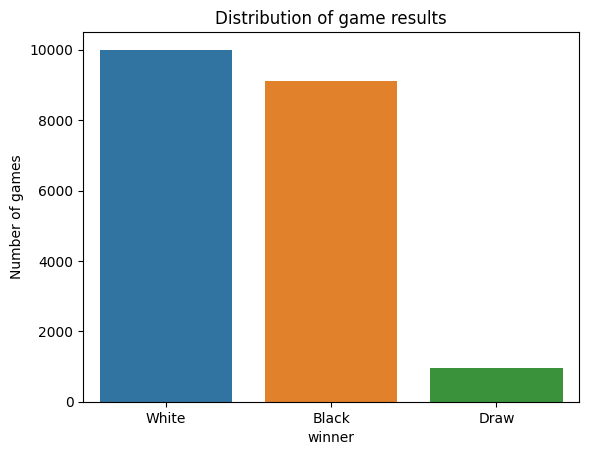

In [17]:
#Distribution of the chess game results
sns.countplot(x= 'winner', data = df )
plt.ylabel('Number of games')
plt.title('Distribution of game results')

In [35]:
#Data Preparation
#Get the initial time and additional time in the 'time_increment' to get total time
df['time_increment']= df['time_increment'].astype(str)
def sum_time_increment(time_str):
    try:
        split_values = time_str.split('+')
        return int(split_values[0]) + int(split_values[1])
    except (AttributeError, ValueError, IndexError):
        return None

df['time_increment'] = df['time_increment'].apply(sum_time_increment)

#select the necessary columns for training the model
X = df[['turns', 'victory_status']]
y = df['winner']

#convert the values in 'victory_status' to numerical values
victorystatus_map = {'Out of Time' : 0, 'Mate' : 1, 'Draw' : 2, 'Resign' : 3}
X['victory_status'] = X['victory_status'].map(victorystatus_map)

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

C:\Users\25479\AppData\Local\Temp\ipykernel_11280\367594337.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['victory_status'] = X['victory_status'].map(victorystatus_map)


In [38]:
#Training and Testing Decision Tree Model 
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

#Make predictions on the test set
y_pred = tree.predict(X_test)

#Calculate the accuracy score of the predictions 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: {:.2f}".format(accuracy))

Accuracy score: 0.89


<Axes: xlabel='turns', ylabel='victory_status'>

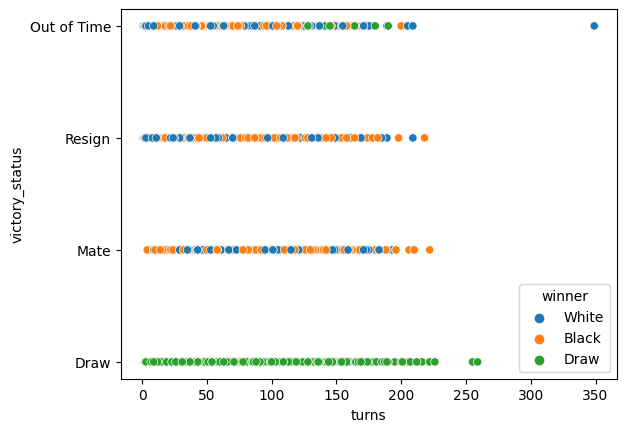

In [51]:
#Relationship between number of moves and victory status
sns.scatterplot(x='turns', y='victory_status', hue = y, data = df)


Text(0.5, 1.0, 'Confusion Matrix')

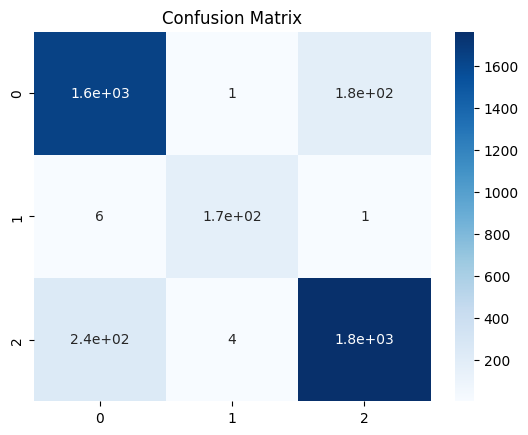

In [54]:
#confusion matrix plot for Decision Tree Model Predictions

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, cmap = "Blues")
plt.title("Confusion Matrix")